In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(1)

In [3]:
def forward(X, W1, b1, W2, b2):
    Z = 1 / (1 + np.exp(-X.dot(W1) - b1))
    A = Z.dot(W2) + b2
    expA = np.exp(A)
    Y = expA / expA.sum(axis=1, keepdims=True)
    return Y, Z

In [4]:
def cost(T, Y):
    dot_T_Y = np.sum(T * np.log(Y), axis = 1)
    return -dot_T_Y.sum()

In [5]:
smooth_para = 0.1

In [6]:
def cost_L1(T, W1, W2, Y):
    dot_T_Y = np.sum(T * np.log(Y), axis = 1)
    return -dot_T_Y.sum() + ((smooth_para/2)*(W1*W1)).sum() + ((smooth_para/2)*(W2*W2)).sum()

In [9]:
def cost_L2(T, W1, W2, Y):
    dot_T_Y = np.sum(T * np.log(Y), axis = 1)
    return -dot_T_Y.sum() + (smooth_para * np.abs(W1)).sum() + (smooth_para * np.abs(W2)).sum()

In [10]:
def classification_rate(Y, P):
    n_correct = 0
    n_total = 0
    for i in range(len(Y)):
        n_total += 1
        if Y[i] == P[i]:
            n_correct += 1
    return float(n_correct) / n_total

In [11]:
def derivative_w2(Z, T, Y):
    return -Z.T.dot(T - Y)

In [12]:
def derivative_b2(T, Y):
    return (-(T - Y)).sum(axis=0)

In [13]:
def derivative_w1_sig(X, Z, T, Y, W2):
    dZ = (T - Y).dot(W2.T) * Z * ( 1 - Z)
    ret2 = X.T.dot(dZ)
    return -ret2

In [14]:
def derivative_b1_sig(T, Y, W2, Z):
    return (-(T - Y).dot(W2.T) * Z * (1-Z)).sum(axis=0)

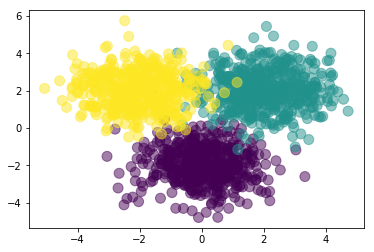

In [15]:
# create the data
Nclass = 500
D = 2 # dimensionality of input
M = 3 # hidden layer size
K = 3 # number of classes

X1 = np.random.randn(Nclass, D) + np.array([0, -2])
X2 = np.random.randn(Nclass, D) + np.array([2, 2])
X3 = np.random.randn(Nclass, D) + np.array([-2, 2])
X = np.vstack([X1, X2, X3])

Y = np.array([0]*Nclass + [1]*Nclass + [2]*Nclass)
N = len(Y)
# turn Y into an indicator matrix for training
T = np.zeros((N, K))
for i in range(N):
    T[i, Y[i]] = 1

# let's see what it looks like
plt.scatter(X[:,0], X[:,1], c=Y, s=100, alpha=0.5)
plt.show()

In [16]:
# randomly initialize weights
w1 = np.random.randn(D, M)
B1 = np.random.randn(M)
w2 = np.random.randn(M, K)
B2 = np.random.randn(K)

cost: 3147.180844402328 classification_rate: 0.26866666666666666
cost: 141.97075097237763 classification_rate: 0.9673333333333334
cost: 123.26725832918534 classification_rate: 0.9686666666666667
cost: 118.83941596682908 classification_rate: 0.9686666666666667
cost: 116.9091029167447 classification_rate: 0.9686666666666667
cost: 115.79062755420198 classification_rate: 0.9693333333333334
cost: 115.03007049303264 classification_rate: 0.9693333333333334
cost: 114.45935430430393 classification_rate: 0.97
cost: 114.00283541809502 classification_rate: 0.97
cost: 113.62188120407879 classification_rate: 0.97


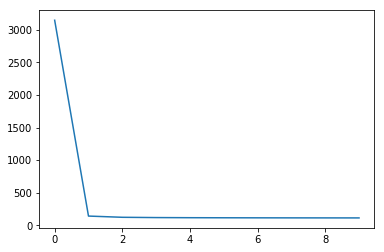

In [17]:
W1 = w1.copy()
b1 = B1.copy()
W2 = w2.copy()
b2 = B2.copy()

learning_rate = 1e-3
costs = []
for epoch in range(1000):
    output, hidden = forward(X, W1, b1, W2, b2)
    if epoch % 100 == 0:
        c = cost(T, output)
        P = np.argmax(output, axis=1)
        r = classification_rate(Y, P)
        print("cost:", c, "classification_rate:", r)
        costs.append(c)

    # this is gradient ASCENT, not DESCENT
    # be comfortable with both!
    # oldW2 = W2.copy()
    W2 -= learning_rate * derivative_w2(hidden, T, output)
    b2 -= learning_rate * derivative_b2(T, output)
    W1 -= learning_rate * derivative_w1_sig(X, hidden, T, output, W2)
    b1 -= learning_rate * derivative_b1_sig(T, output, W2, hidden)
    
plt.plot(costs)
plt.show()

cost: 3147.8507405655346 classification_rate: 0.26866666666666666
cost: 815.3255275076774 classification_rate: 0.9726666666666667
cost: 803.1484840178667 classification_rate: 0.972
cost: 794.5250281181148 classification_rate: 0.9706666666666667
cost: 794.4576033866153 classification_rate: 0.9706666666666667
cost: 794.4584340778028 classification_rate: 0.9706666666666667
cost: 794.458534189001 classification_rate: 0.9706666666666667
cost: 794.4585422496808 classification_rate: 0.9706666666666667
cost: 794.4585428837396 classification_rate: 0.9706666666666667
cost: 794.4585429335308 classification_rate: 0.9706666666666667


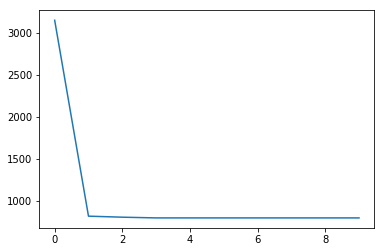

In [18]:
W1 = w1.copy()
b1 = B1.copy()
W2 = w2.copy()
b2 = B2.copy()

learning_rate = 1e-3
costs_L1 = []
for epoch in range(1000):
    output, hidden = forward(X, W1, b1, W2, b2)
    if epoch % 100 == 0:
        c = cost_L1(T, W1, W2, output)
        P = np.argmax(output, axis=1)
        r = classification_rate(Y, P)
        print("cost:", c, "classification_rate:", r)
        costs_L1.append(c)

    # this is gradient ASCENT, not DESCENT
    # be comfortable with both!
    # oldW2 = W2.copy()
    W2 -= learning_rate * derivative_w2(hidden, T, output) + smooth_para * W2
    b2 -= learning_rate * derivative_b2(T, output) + smooth_para * b2
    W1 -= learning_rate * derivative_w1_sig(X, hidden, T, output, W2) + smooth_para * W1
    b1 -= learning_rate * derivative_b1_sig(T, output, W2, hidden) + smooth_para * b1

    
plt.plot(costs_L1)
plt.show()

cost: 3148.3399809391053 classification_rate: 0.26866666666666666
cost: 1269.997488736057 classification_rate: 0.6466666666666666
cost: 1246.1851497338391 classification_rate: 0.646
cost: 1246.4214158694704 classification_rate: 0.6486666666666666
cost: 1239.7854664621416 classification_rate: 0.6466666666666666
cost: 1250.3414334615393 classification_rate: 0.6473333333333333
cost: 1236.6733888207314 classification_rate: 0.6473333333333333
cost: 1249.6660952044288 classification_rate: 0.644
cost: 1266.282365894923 classification_rate: 0.6453333333333333
cost: 1250.7725519077355 classification_rate: 0.6433333333333333


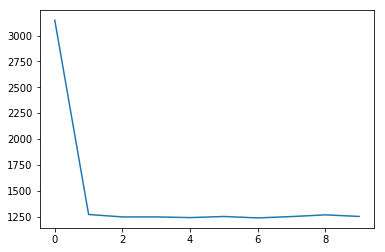

In [19]:
W1 = w1.copy()
b1 = B1.copy()
W2 = w2.copy()
b2 = B2.copy()

learning_rate = 1e-3
costs_L2 = []
for epoch in range(1000):
    output, hidden = forward(X, W1, b1, W2, b2)
    if epoch % 100 == 0:
        c = cost_L2(T, W1, W2, output)
        P = np.argmax(output, axis=1)
        r = classification_rate(Y, P)
        print("cost:", c, "classification_rate:", r)
        costs_L2.append(c)

    # this is gradient ASCENT, not DESCENT
    # be comfortable with both!
    # oldW2 = W2.copy()
    W2 -= learning_rate * derivative_w2(hidden, T, output) + smooth_para * np.sign(W2)
    b2 -= learning_rate * derivative_b2(T, output) + smooth_para * np.sign(b2)
    W1 -= learning_rate * derivative_w1_sig(X, hidden, T, output, W2) + smooth_para * np.sign(W1)
    b1 -= learning_rate * derivative_b1_sig(T, output, W2, hidden) + smooth_para * np.sign(b1)
    
plt.plot(costs_L2)
plt.show()

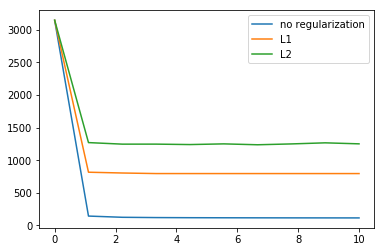

In [20]:
x1 = np.linspace(0, 10, len(costs))
plt.plot(x1, costs, label="no regularization")
x2 = np.linspace(0, 10, len(costs_L1))
plt.plot(x2, costs_L1, label="L1")
x3 = np.linspace(0, 10, len(costs_L2))
plt.plot(x3, costs_L2, label="L2")
plt.legend()
plt.show()